# Table of contants
Problem Definition
- Defining the problem statement and understanding the project goals.

Exploratory Data Analysis (EDA)
- Summary statistics and data distribution
- Correlation analysis
- Data visualization techniques (histograms, box plots, scatter plots, etc.)

Data Cleaning
- Handling missing values
- Dealing with duplicate data
- Removing irrelevant or redundant features
- Handling inconsistent data or typos
- Encoding categorical variables

Data Visualization

- Using libraries like Matplotlib, Seaborn, or Plotly
- Visualizing distributions, relationships, and patterns in data
- Creating bar plots, pie charts, histograms, scatter plots, etc.
- Plotting interactive visualizations (if applicable)


# Problem statement and project goal.
Problem Statement:
- The objective of this project is to analyze and understand the trends and factors associated with suicide rates from 1985 to 2016. The goal is to identify patterns, correlations, and potential influencing factors to gain insights into the phenomenon of suicide and its variations over time.
- Identify the countries with the highest suicide rates.
- Identify the demographic groups with the highest suicide rates.

Project Goals:

- Explore the overall trends in suicide rates over the specified time period.
- Identify any significant variations in suicide rates across different demographic groups such as age, gender, and geographical regions.
- Investigate potential factors that might be associated with suicide rates, such as GDP, unemployment rates, education levels, etc.
- Analyze the relationship between socio-economic indicators and suicide rates to identify any patterns or correlations.
- Identify high-risk groups or regions with disproportionately high suicide rates and examine potential contributing factors.
- Perform visualizations and statistical analysis to communicate the findings effectively.
- Generate insights and recommendations to raise awareness and inform preventive measures, mental health policies, and interventions.

# Data Collection
- This data is from kaggle - https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016?datasetId=85351&sortBy=voteCount

In [1]:
# Importing necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset

df = pd.read_csv("D:\kiggle file\Bodavan\suicide\master.csv")
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


# necessary information about out data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB




Summary of the columns:

- country: Represents the country name.
- year: Indicates the year of observation.
- sex: Represents the gender (male or female).
- age: Represents the age group.
- suicides_no: Indicates the number of suicides.
- population: Represents the population count.
- suicides/100k pop: Indicates the number of suicides per 100,000 population.
- country-year: Represents a combination of the country and year.
- HDI for year: Represents the Human Development Index for the corresponding year.
- gdp_for_year : Represents the GDP (Gross Domestic Product) for the corresponding year.
- gdp_per_capita : Represents the GDP per capita for the corresponding year.
   - difference between GDP and GDP per capita is that GDP is the total value of goods and services a country produces annually whereas GDP per capita is a measure of the country's economic output per person.
- generation: Represents the generational cohort.



In [4]:
# number of rows and columns
df.shape

(27820, 12)

In [5]:
# all columns name
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
# Renameing the columns name
             
df=df.rename(columns={'country':'country','year':'year','sex':'gender','age':'age','suicides_no':'suicides_no',
                      'population':'population','suicides/100k pop':'suicides100kpop',
                      'country-year':'countryyear','HDI for year':'HDI_for_year',' gdp_for_year ($) ':'gdp_for_year',
                      'gdp_per_capita ($)':'gdp_per_capita','generation':'generation'})
df.columns

Index(['country', 'year', 'gender', 'age', 'suicides_no', 'population',
       'suicides100kpop', 'countryyear', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [7]:
# Group the columns by data types
columns_by_type = df.columns.to_series().groupby(df.dtypes).groups
for dtype, columns in columns_by_type.items():
    column_list = ", ".join(columns)
    print(f"Columns of data type {dtype}: {column_list}")

Columns of data type int64: year, suicides_no, population, gdp_per_capita
Columns of data type float64: suicides100kpop, HDI_for_year
Columns of data type object: country, gender, age, countryyear, gdp_for_year, generation


In [8]:
# number of country 
df.country.nunique()

101

# summary of dataset

In [9]:
df.describe()

,year,suicides_no,population,suicides100kpop,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# Data Cleaning
- Handling missing values
- Removing irrelevant or redundant features
- Encoding categorical variables

# Handling missing values

In [10]:
# checking missing value
df.isnull().sum()

country                0
year                   0
gender                 0
age                    0
suicides_no            0
population             0
suicides100kpop        0
countryyear            0
HDI_for_year       19456
gdp_for_year           0
gdp_per_capita         0
generation             0
dtype: int64

- just HDI for year have missing value. let's fill it with mean of HDI. 
  i didn't drop the HDI missing rows cause there is a lot's of it. 

# Removing irrelevant or redundant features

- as HDI for year columns have most of the values empty so i will delate this column
- also country_year column have no use

In [11]:
# drop column
df = df.drop(["countryyear","HDI_for_year"],axis=1)
df.columns

Index(['country', 'year', 'gender', 'age', 'suicides_no', 'population',
       'suicides100kpop', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

# Let's analyes the dataset by visulizing 

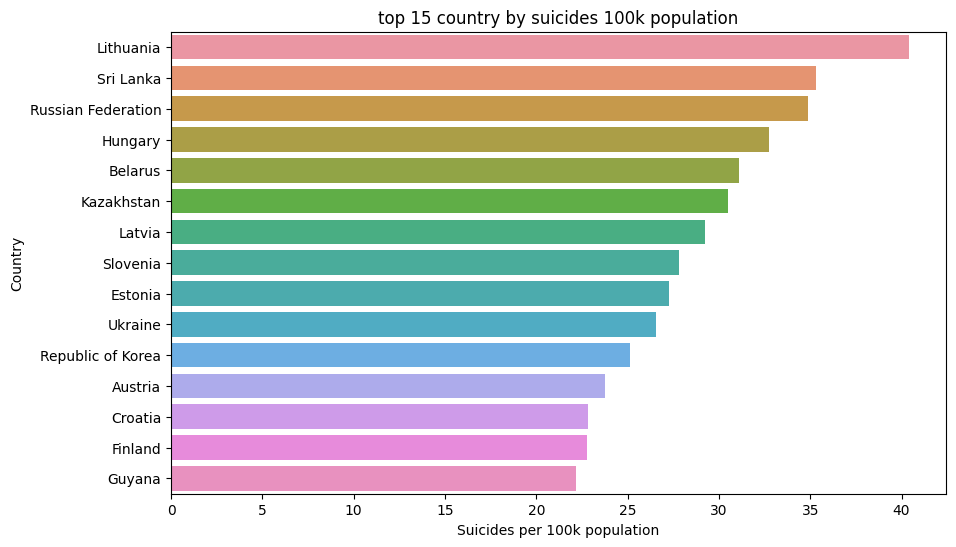

In [12]:
# top 15 country by suicides 100k population

country_suicide = pd.DataFrame(df.groupby("country")["suicides100kpop"].mean().nlargest(15)).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=country_suicide,x="suicides100kpop",y="country")
plt.xlabel("Suicides per 100k population")
plt.ylabel("Country")
plt.title("top 15 country by suicides 100k population")
plt.show()

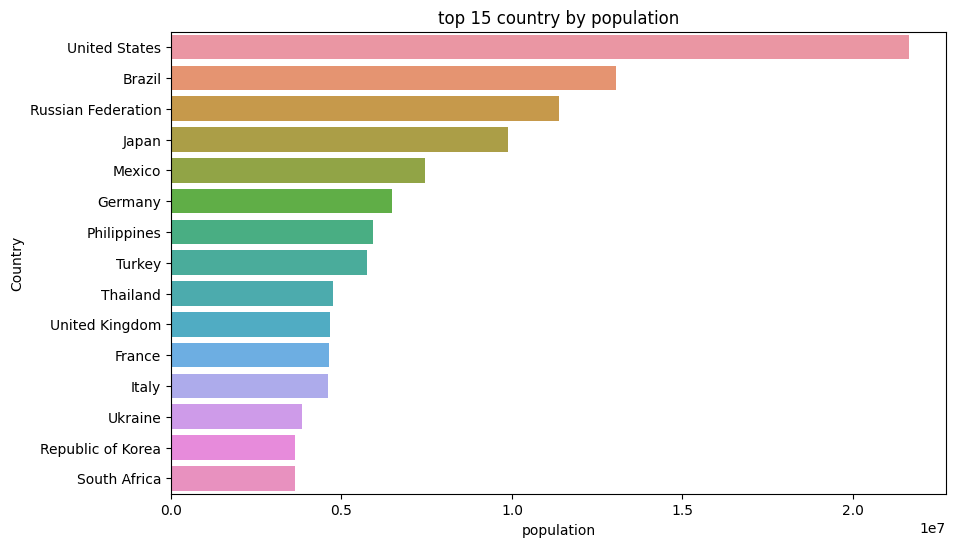

In [13]:
# top 15 country by population

country_suicide = pd.DataFrame(df.groupby("country")["population"].mean().nlargest(15)).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=country_suicide,x="population",y="country")
plt.xlabel("population")
plt.ylabel("Country")
plt.title("top 15 country by population")
plt.show()

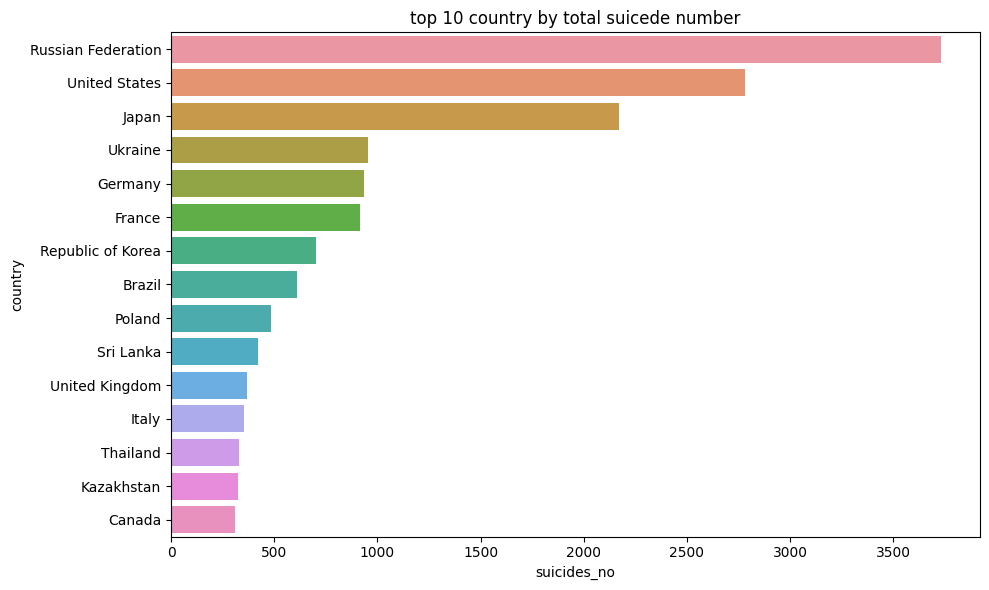

In [14]:
# top 10 country by total suicede number

top_country = pd.DataFrame(df.groupby("country")["suicides_no"].mean().reset_index().nlargest(15, "suicides_no"))

plt.figure(figsize=(10,6))
sns.barplot(data=top_country,x="suicides_no",y="country")
plt.title("top 10 country by total suicede number")
plt.tight_layout()

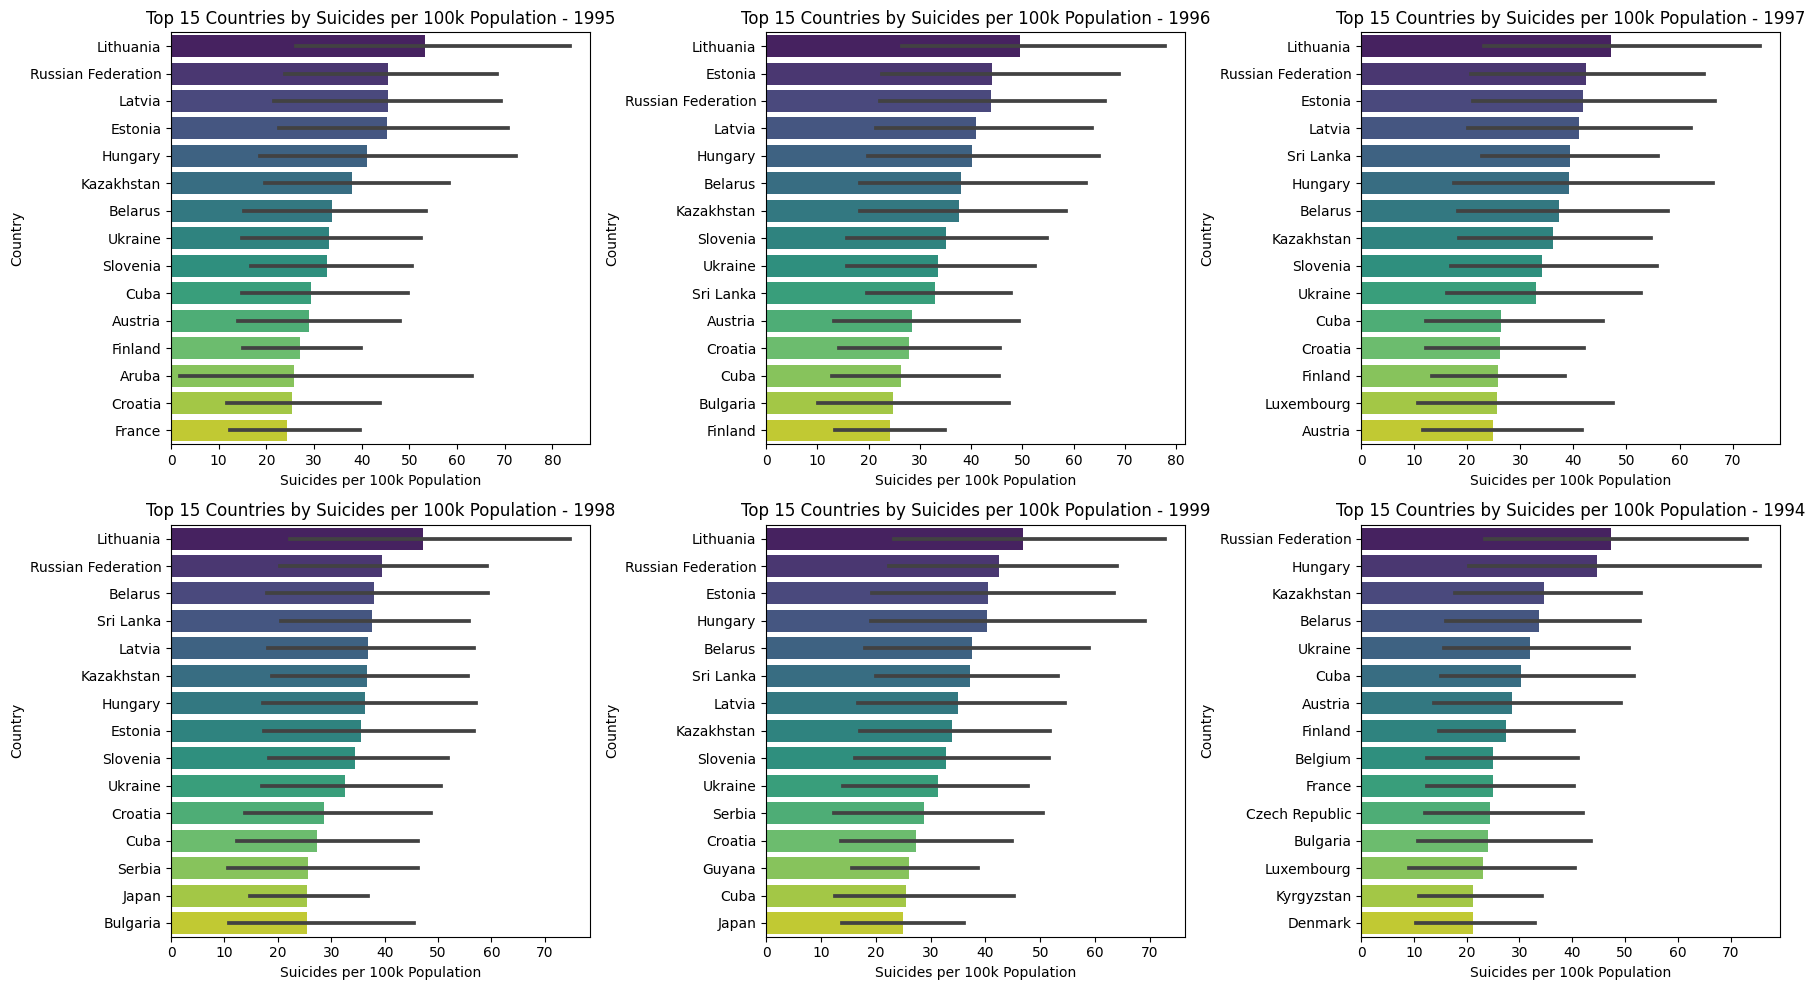

In [15]:
 # top 6 years with the highest suicides per 100k population and then visualize the top 15 countries for each of those 6 years:

# top 6 years with the highest suicides per 100k population
top_years = df.groupby('year')['suicides100kpop'].mean().nlargest(6).index

# Filter the DataFrame for the top years
df_top_years = df[df['year'].isin(top_years)]

# Create a subplot grid for the top years
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)

# Iterate over the top years and create bar plots for the top 15 countries in each year
for i, year in enumerate(top_years):
    ax = axes[i // 3, i % 3]
    df_year = df_top_years[df_top_years['year'] == year]
    top_countries = df_year.groupby('country')['suicides100kpop'].mean().nlargest(15).index
    df_top_countries = df_year[df_year['country'].isin(top_countries)]
    sns.barplot(x='suicides100kpop', y='country', data=df_top_countries, order=top_countries, palette='viridis', ax=ax)
    ax.set_xlabel('Suicides per 100k Population')
    ax.set_ylabel('Country')
    ax.set_title(f'Top 15 Countries by Suicides per 100k Population - {year}')

# Show the plot
plt.tight_layout()
plt.show()

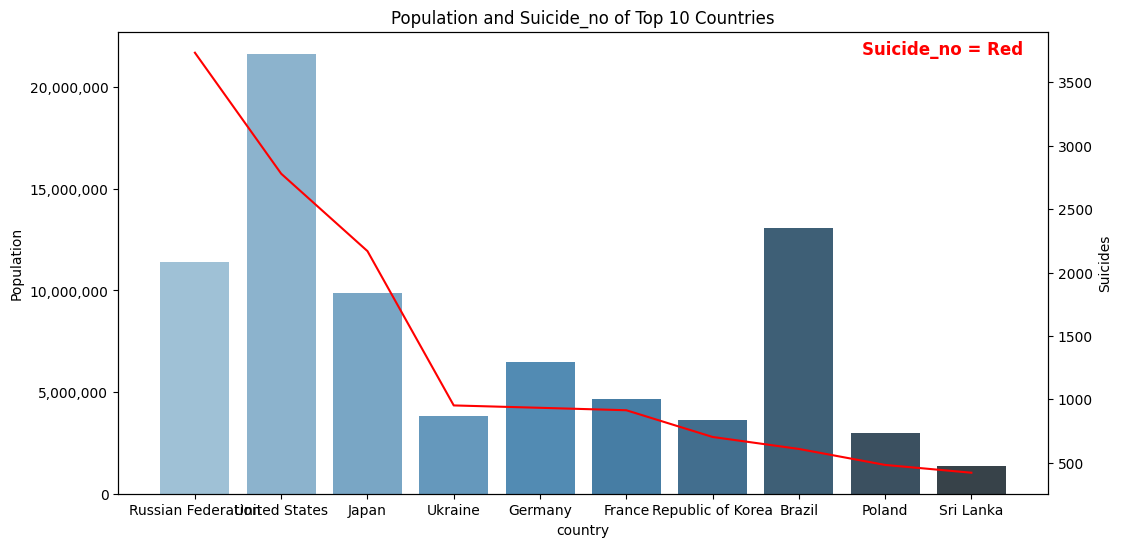

In [16]:
#Top 10 countries by suicide_no and plot the population

country_stats = df.groupby('country').agg({'suicides_no': 'mean', 'population': 'mean'}).nlargest(10, 'suicides_no')

# Create a bar chart with population and a line plot for suicide_no
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Bar chart for population
sns.barplot(data=country_stats, x=country_stats.index, y='population', ax=ax1, palette='Blues_d')
ax1.set_ylabel('Population')

# Line plot for suicide_no
sns.lineplot(data=country_stats, x=country_stats.index, y='suicides_no', ax=ax2, sort=False, color='red')
ax2.set_ylabel('Suicides')

plt.title('Population and Suicide_no of Top 10 Countries')
plt.xlabel('Country')
plt.xticks(rotation = 45)

import matplotlib.ticker as ticker
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Add text annotation to the chart
plt.text(0.80, 0.95, 'Suicide_no = Red', transform=ax2.transAxes, color='red', fontsize=12, fontweight='bold')


plt.show()

Text(0.5, 1.0, 'Number of Male and Female suicide per 100k population')

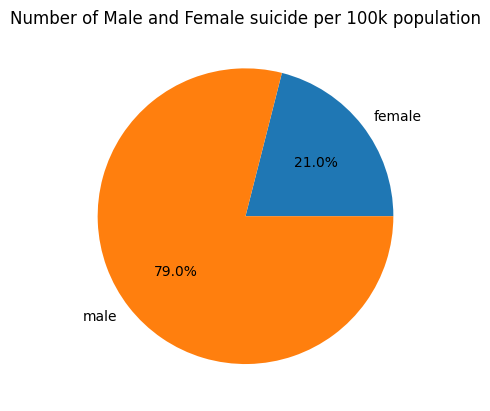

In [17]:
# Number of Male and Female suicide per 100k population
data = df.groupby('gender')['suicides100kpop'].sum()

# Create a pie chart
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Number of Male and Female suicide per 100k population")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '15-24 years'),
  Text(1, 0, '25-34 years'),
  Text(2, 0, '35-54 years'),
  Text(3, 0, '5-14 years'),
  Text(4, 0, '55-74 years'),
  Text(5, 0, '75+ years')])

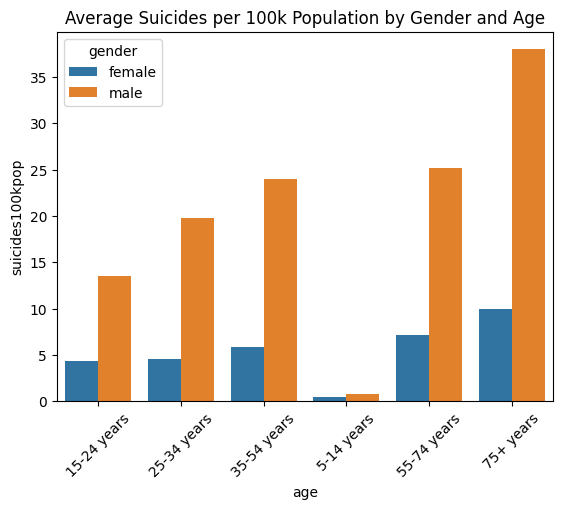

In [18]:
# Average Suicides per 100k Population by Gender and Age

data= df.groupby(['gender', 'age'])['suicides100kpop'].mean().reset_index()
sns.barplot(data=data,x="age",y="suicides100kpop",hue="gender")
plt.title("Average Suicides per 100k Population by Gender and Age")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Suicides per 100k Population by Generation')

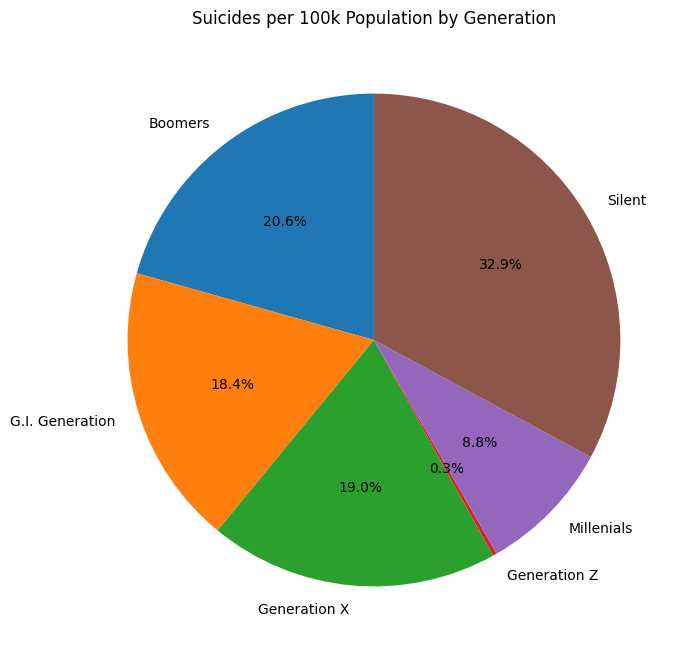

In [19]:
#df['suicides100kpop'] = pd.to_numeric(df['suicides100kpop'], errors='coerce')

# Group data by generation and calculate the sum of suicides100kpop
data = df.groupby('generation')['suicides100kpop'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title('Suicides per 100k Population by Generation')

Text(0.5, 1.0, 'Suicides per 100k Population by country [Top 15]')

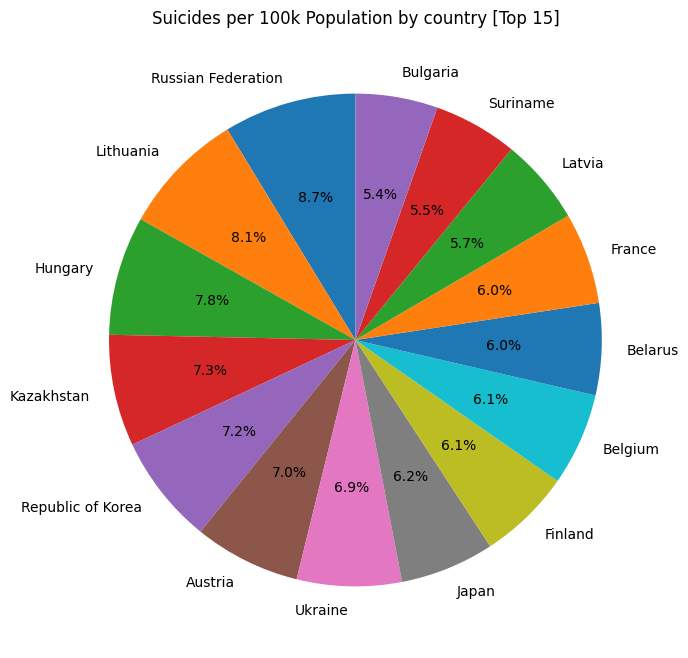

In [20]:
# top 15 country by suicide per 100k 

data = df.groupby('country')['suicides100kpop'].sum()
data = data.nlargest(15)
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title('Suicides per 100k Population by country [Top 15]')

Text(0.5, 1.0, 'gdp per capita by country')

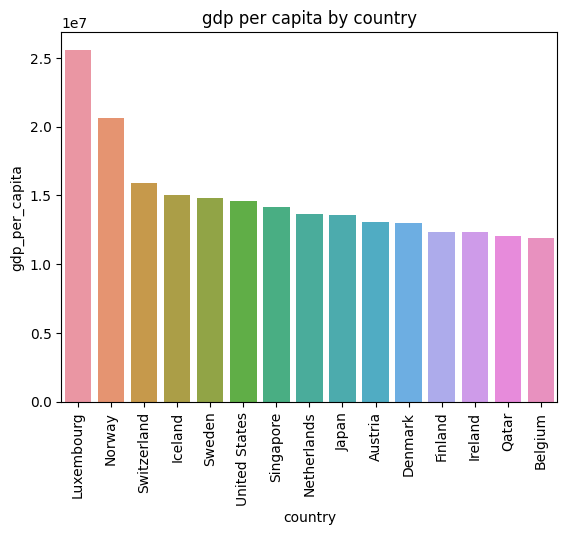

In [21]:
# GDP per capita by country
data = df.groupby("country")["gdp_per_capita"].sum()
data = data.nlargest(15).reset_index()
sns.barplot(data=data,x="country",y="gdp_per_capita")
plt.xticks(rotation=90)
plt.title("gdp per capita by country")

In [31]:
data = df.groupby("country").agg({"gdp_per_capita": "sum","suicides100kpop":"sum"})

#sorted by suicide100kpop
data_suicide = data.nlargest(15,"suicides100kpop").reset_index()
# sorted by gdp_per_capita
data_gdp = data.nlargest(15,"gdp_per_capita")

data_suicide

,country,gdp_per_capita,suicides100kpop
0,Russian Federation,2112096,11305.13
1,Lithuania,2431504,10588.88
2,Hungary,2904716,10156.07
3,Kazakhstan,1662684,9519.52
4,Republic of Korea,5506068,9350.45
5,Austria,13088000,9076.23
6,Ukraine,627492,8931.66
7,Japan,13539888,8025.23
8,Finland,12342960,7924.11
9,Belgium,11928828,7900.50


In [24]:
df.head(5)

,country,year,gender,age,suicides_no,population,suicides100kpop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers


Text(0, 0.5, 'Suicides per 100k Population')

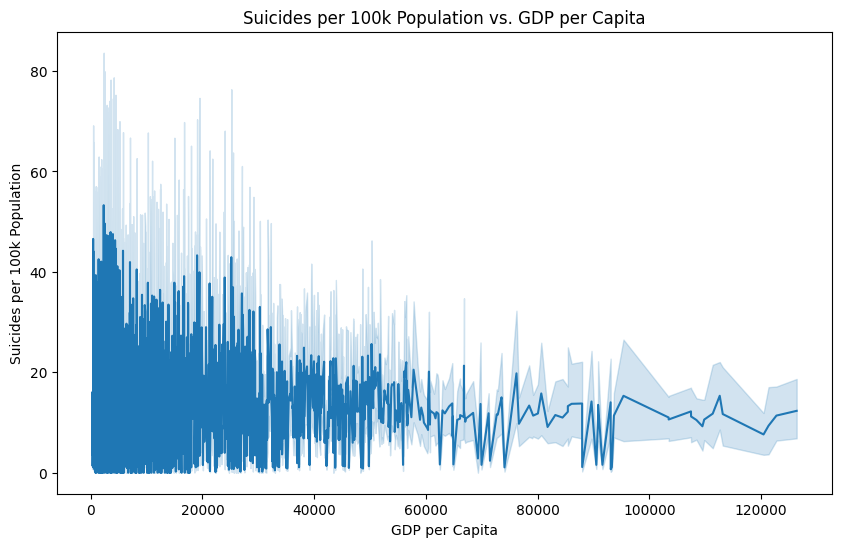

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x="gdp_per_capita",y="suicides100kpop")
plt.title('Suicides per 100k Population vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100k Population')


Text(0.5, 1.0, 'Gdp per capita by year')

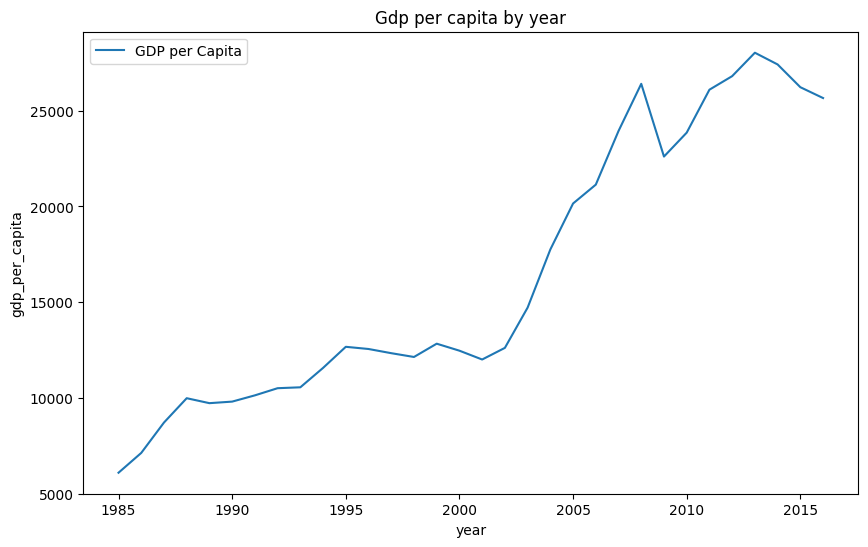

In [26]:
data = df.groupby("year")["gdp_per_capita"].mean()
data=data.reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x="year", y="gdp_per_capita", label="GDP per Capita")
plt.title("Gdp per capita by year")


Text(0.5, 1.0, 'suicides per 100k population by year')

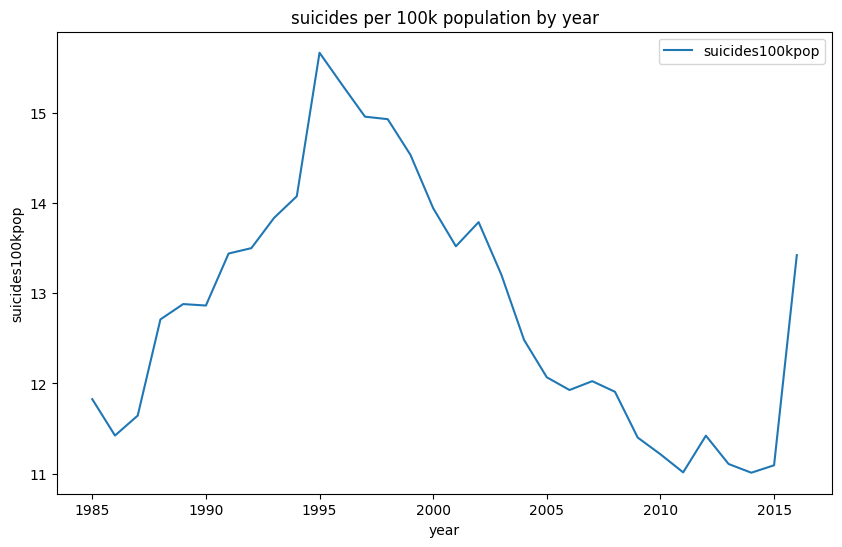

In [27]:
data = df.groupby("year")["suicides100kpop"].mean()
data=data.reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x="year", y="suicides100kpop", label="suicides100kpop")
plt.title("suicides per 100k population by year")